<a href="https://colab.research.google.com/github/MJ-best/macro_finance/blob/main/minjun_macro_finance_20221211.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 매크로 분석을 위한 파이썬
- 2022년 12월 11일 시작
- <브라질에서 비가 내리면 스타벅스 주식을 사라>, <원칙>을 읽고 감명받아서 시작했다
- 마켓타이밍을 잡을 수는 없지만 거래를 해야할 지 말아야 할지, 호황인지 불황인지 업종의 순환은 어떤지를 살펴보려고 한다
- 한투 API와 연동하여 주식거래 자동화

In [1]:
import datetime
from pytz import timezone

print("last update : ",datetime.datetime.now(timezone('Asia/Seoul')))

last update :  2022-12-11 01:21:53.996442+09:00


### FinanceDataReader 
- 주식가격정보 및 각종 선행지표를 불러올 수 있는 라이브러리
- https://github.com/financedata-org/FinanceDataReader

In [ ]:
pip install -U finance-datareader

In [29]:
import FinanceDataReader as fdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
#한국 거래소 상장종목 전체
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,60400,1,1200,2.03,59300,60600,59300,10529632,633777717900,360574866020000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,515000,2,-16000,-3.01,533000,534000,507000,621086,319858394500,120510000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,81500,1,2700,3.43,79400,81500,79300,2985508,240904110800,59332192747500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,827000,3,0,0.00,834000,835000,815000,47743,39408528000,58860898000000,71174000,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,54700,1,1500,2.82,53800,54700,53600,826927,44870497500,45011902490000,822886700,STK


In [6]:
# S&P 500 상장종목 전체
df_SnP500 = fdr.StockListing('S&P500')
df_SnP500.head()

,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment


In [8]:
# 삼성전자의 주식의 가격 불러오기
df_samsung = fdr.DataReader('005930','2022')
df_samsung.tail(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-11-28,60500,60500,59800,60100,8589032,-0.014754
2022-11-29,59900,60600,59800,60600,7014160,0.008319
2022-11-30,60400,62200,60200,62200,19768903,0.026403
2022-12-01,63100,63200,62300,62600,16631445,0.006431
2022-12-02,62500,62500,60400,60400,15331184,-0.035144
2022-12-05,60900,61100,60000,60300,13767787,-0.001656
2022-12-06,59800,60100,59200,59200,13888300,-0.018242
2022-12-07,58800,59600,58500,58900,12100662,-0.005068
2022-12-08,58700,59200,58600,59200,12986815,0.005093


In [32]:
df = fdr.DataReader('FRED:NASDAQCOM', data_source='fred')
df

,NASDAQCOM
DATE,
1980-01-02,148.17
1980-01-03,145.97
1980-01-04,148.02
1980-01-07,148.62
1980-01-08,150.68
...,...
2022-12-02,11461.50
2022-12-05,11239.94
2022-12-06,11014.89


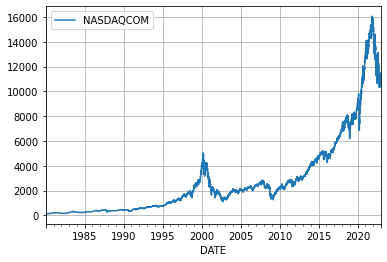

In [33]:
df.plot()

In [39]:
# 최근(2020년 10월), 나스닥지수(NASDAQCOM)와 주간 실업수당 청구 건수(ICSA)

df = fdr.DataReader('FRED:NASDAQCOM,ICSA', start='2019', data_source='fred')
df

,NASDAQCOM,ICSA
DATE,,
2019-01-02,6665.938,NaN
2019-01-03,6463.504,NaN
2019-01-04,6738.855,NaN
2019-01-05,6738.855,222000.0
2019-01-07,6823.469,222000.0
...,...,...
2022-12-03,11461.500,230000.0
2022-12-05,11239.940,230000.0
2022-12-06,11014.890,230000.0


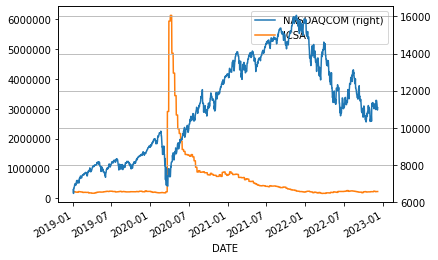

In [41]:
ax = df.plot(secondary_y='NASDAQCOM')